# How an image is seen by computer

This notebook explains arithmetic on images. Since, an image is a matrix of numbers, all linear algebra operations can be applied to images. Here are some fun and interesting points on images.

### Import required packages

In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

### Opening and Analyzing the Image

1. Read the image directory location
2. Open the image
3. Display the image
4. Print the image resolution in pixels 
5. Print the image type(mode) to check the color profile. `Mode L` confirms the color profile is grayscale.

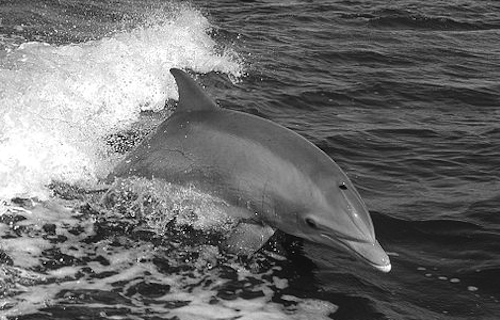

Resolution (500, 320)
mode L means greyscale image:  L


In [2]:
#TO DO choose your own greyscale image 32X32
file = "dolphin.png"
im = Image.open(file)
display(im)
print('Resolution', im.size)
print('mode L means greyscale image: ', im.mode)

### Resizing the image
1. If required, resize the above image to 32x32 pixels 
2. Check the resolution
2. Represent the image numerically as a matrix

pixel means picture elements

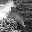

Resolution is:  (32, 32)
[[ 96  93  91 ...,  62 117  78]
 [ 81  84  79 ...,  71  42  44]
 [102 170 128 ...,  36  37  35]
 ..., 
 [ 70 164 174 ...,  59  80  31]
 [147 165 163 ...,  38  54  48]
 [126  76  57 ...,  48  37  51]]


In [3]:
im_32 = im.resize((32,32))
display(im_32)
print('Resolution is: ', im_32.size)

im_matrix = np.matrix(im_32) #converting image to matrix
print(im_matrix)

### Matrix Manipulation
1. Update row 0 with zeros
1. Print the matrix
1. Display the image
2. Replace the entire matrix with zeros
2. Print the matrix
2. Display the image

[[  0   0   0 ...,   0   0   0]
 [ 81  84  79 ...,  71  42  44]
 [102 170 128 ...,  36  37  35]
 ..., 
 [ 70 164 174 ...,  59  80  31]
 [147 165 163 ...,  38  54  48]
 [126  76  57 ...,  48  37  51]]


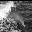

In [4]:
im_matrix[0,:]=im_matrix[0,:]*0 #multiplying row 0 with zeros
print(im_matrix)
im_r0 = Image.fromarray(im_matrix) #converting matrix to image
display(im_r0)

### Another way of obtaining the numerical values of the image

pixel value at (4,4) before update: 183
pixel value at (4,4) after update:  255
51


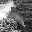

In [5]:
pixels = im_32.load()
print('pixel value at (4,4) before update:', pixels[4,4])
#update pixel value to zero here
pixels[4,4]=300

# using getpixel method 
print ('pixel value at (4,4) after update: ', im_32.getpixel((4, 4))) 

cordinate = x, y = 31, 31
print (im_32.getpixel(cordinate));
display(im_32)

### Function to reduce each pixel value by half

1. The following function reduces each pixel's numerical value by 50%
2. Display the image


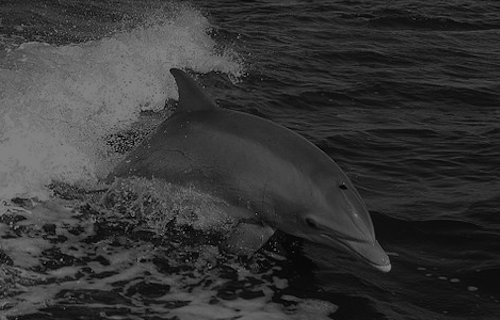

In [6]:
def half(pixel, num=0.5): 
    return pixel * num

half_im = im.point(half)
half_im.save("dolphin1.png")
display(half_im)

### Invert each pixel's value

1. Substract each pixel value from 255 which means if the pixel value is 5, its inverted value is 255 - 5 = 250.  
2. Print the matrix
3. Display the image


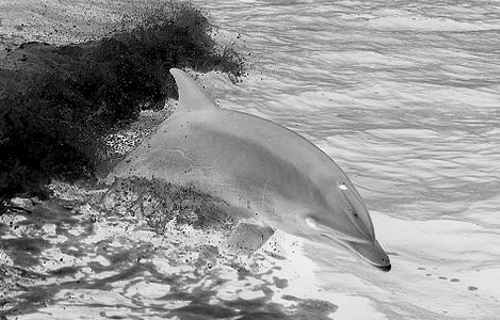

In [7]:
def inv(pixel, num=255):
    return num - pixel
inv_im = im.point(inv)
inv_im.save("dolphin2.png")
display(inv_im)

[[182 186 183 ..., 223 217 213]
 [173 218 198 ..., 184 185 192]
 [158 197 190 ..., 159 156 158]
 ..., 
 [103  58   7 ..., 196 200 205]
 [102  73  58 ..., 200 199 199]
 [132  75  64 ..., 191 191 192]]


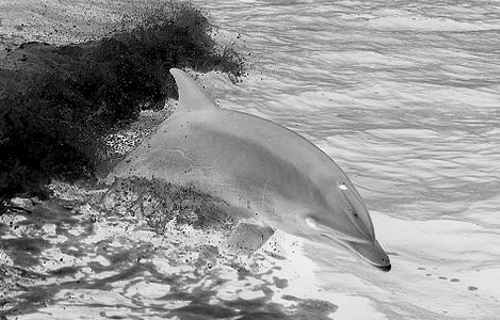

In [8]:
#Using NumPy
im_matrix = np.matrix(im)
matrix_inv = 255 - im_matrix 
print(matrix_inv)
im_inv = Image.fromarray(matrix_inv)
display(im_inv)

### Applying more functions

1. Clamping the image with f(x) = (100/255)x + 100
2. Quadratic transformation with f(x) = 255(x/255)^2
3. Display the images


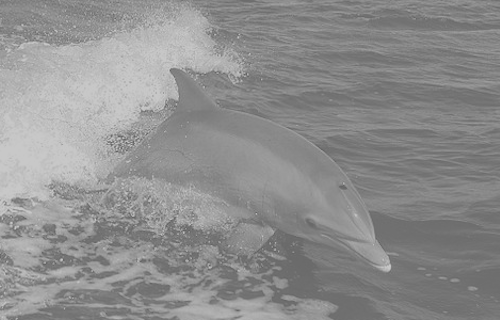

In [9]:
def clamp(pixel):
    return ((100/255)*pixel)+100
clamp_im = im.point(clamp)
display(clamp_im)

[[128 127 128 ..., 112 114 116]
 [132 114 122 ..., 127 127 124]
 [138 122 125 ..., 137 138 138]
 ..., 
 [159 177 197 ..., 123 121 119]
 [160 171 177 ..., 121 121 121]
 [148 170 174 ..., 125 125 124]]


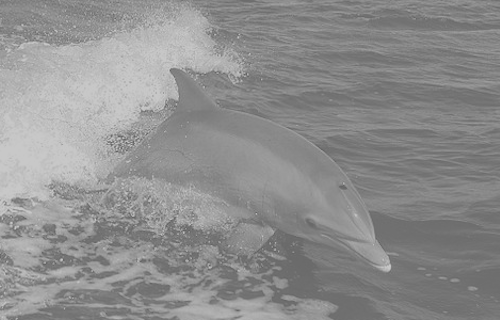

In [10]:
#above function using numpy
im_matrix = np.matrix(im)
im_matrix = ((100/255) * im_matrix ) + 100   #f(x) = (100/255)x + 100
im_matrix_int = im_matrix.astype(np.uint8)   #converting pixel value into uint8_t type (unsigned integers from 0 to 255)
print(im_matrix_int)
im_clamp = Image.fromarray(im_matrix_int)
display(im_clamp)

[[ 20  18  20 ...,   4   5   6]
 [ 26   5  12 ...,  19  19  15]
 [ 36  13  16 ...,  36  38  36]
 ..., 
 [ 90 152 241 ...,  13  11   9]
 [ 91 129 152 ...,  11  12  12]
 [ 59 127 143 ...,  16  16  15]]


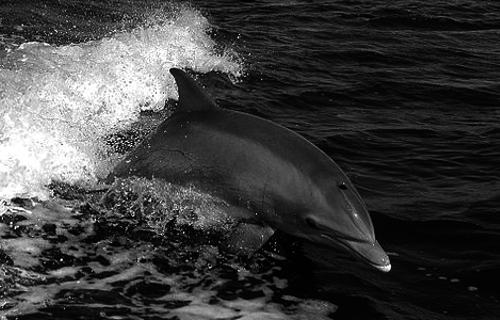

In [11]:
im_matrix = np.matrix(im)
im_matrix = (np.square(im_matrix/255))*255  #f(x) = 255(x/255)^2
im_matrix_int = im_matrix.astype(np.uint8)  #converting pixel value into uint8_t type (unsigned integers from 0 to 255)
print(im_matrix_int)
im_sqr = Image.fromarray(im_matrix_int)
display(im_sqr)

### Average of images:
Assuming all the images are of same size, we can compute the average of all those images by adding those matrices and dividing with the number of images.

In [23]:
def compute_average(imlist):
    """ Compute average of a list of images """
# open first image and make into array of type float
    avg_im = np.array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]: 
        try:
            avg_im += np.array(Image.open(imname)) 
        except:
            print(imname + '...skipped')
    avg_im /= len(imlist)
  # return average as uint8
    return np.array(avg_im, 'uint8')

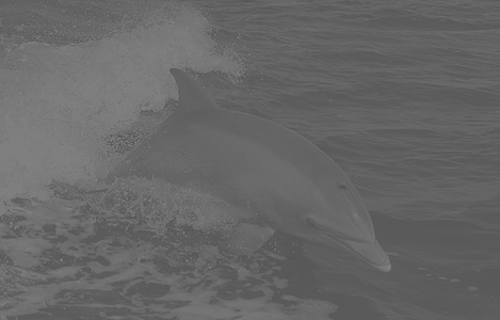

In [25]:
im_list = ['dolphin.png','dolphin1.png','dolphin2.png']
im_avg = compute_average(im_list)
display(Image.fromarray(im_avg))

TO DO

Multiply two images:(Take any 2 images)

consider 2 gray scale images 

multiply and display the resultant image

### PCA of Images
Principal Component Analysis (PCA ) is a useful technique for dimensionality reduction. A megapixel image has dimensions in the millions. With such high dimensionality, it is no surprise that dimensionality reduction comes handy in many computer vision applications. The projection matrix resulting from PCA can be seen as a change of coordinates to a coordinate system where the coordinates are in descending order of importance.
To apply PCA on image data, the images need to be converted to a one-dimensional vector representation, for example using NumPy’s flatten() method.
The flattened images are collected in a single matrix by stacking them, one row for each image. The rows are then centered relative to the mean image before the computation of the dominant directions. To find the principal components, singular value decomposition (SVD) is usually used, but if the dimensionality is high, there is a useful trick that can be used instead since the SVD computation will be very slow in that case. 

TO  DO
Implment PCA as described avove